# Python Project

In [1727]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import f1_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [1728]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Train Dataset

In [1729]:
train.shape

(891, 12)

In [1730]:
test.shape

(418, 11)

In [1731]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1732]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1733]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1734]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1735]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Fixing missing values: AGE

### Names/titles

In [1736]:
for i in train:
    train['Title']=train['Name'].str.extract('([A-Za-z]+)\.')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1737]:
for i in test:
    test['Title']=test['Name'].str.extract('([A-Za-z]+)\.')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


### Using Age and title to make better approximations of the missing values

In [1738]:
train['Age'] = train.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1739]:
test['Age'] = test.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [1740]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [1741]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [1742]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [1743]:
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

FIXED!

##  Cabin missing values

In [1744]:
train['NewCabin']= train['Cabin'].str[0]

In [1745]:
train.groupby('NewCabin', as_index=False)['Fare'].mean()

,NewCabin,Fare
0,A,39.623887
1,B,113.505764
2,C,100.151341
3,D,57.244576
4,E,46.026694
5,F,18.696792
6,G,13.581250
7,T,35.500000


In [1746]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NewCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


In [1747]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NewCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


In [1749]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NewCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


# Cleaning the other columns

In [1750]:
train['Sex'] =train['Sex'] .map(lambda s: 1 if s =='male' else 0)
test['Sex'] =test['Sex'] .map(lambda s: 1 if s =='male' else 0)

In [1751]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NewCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


In [1752]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1753]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [1754]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace= True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace= True)

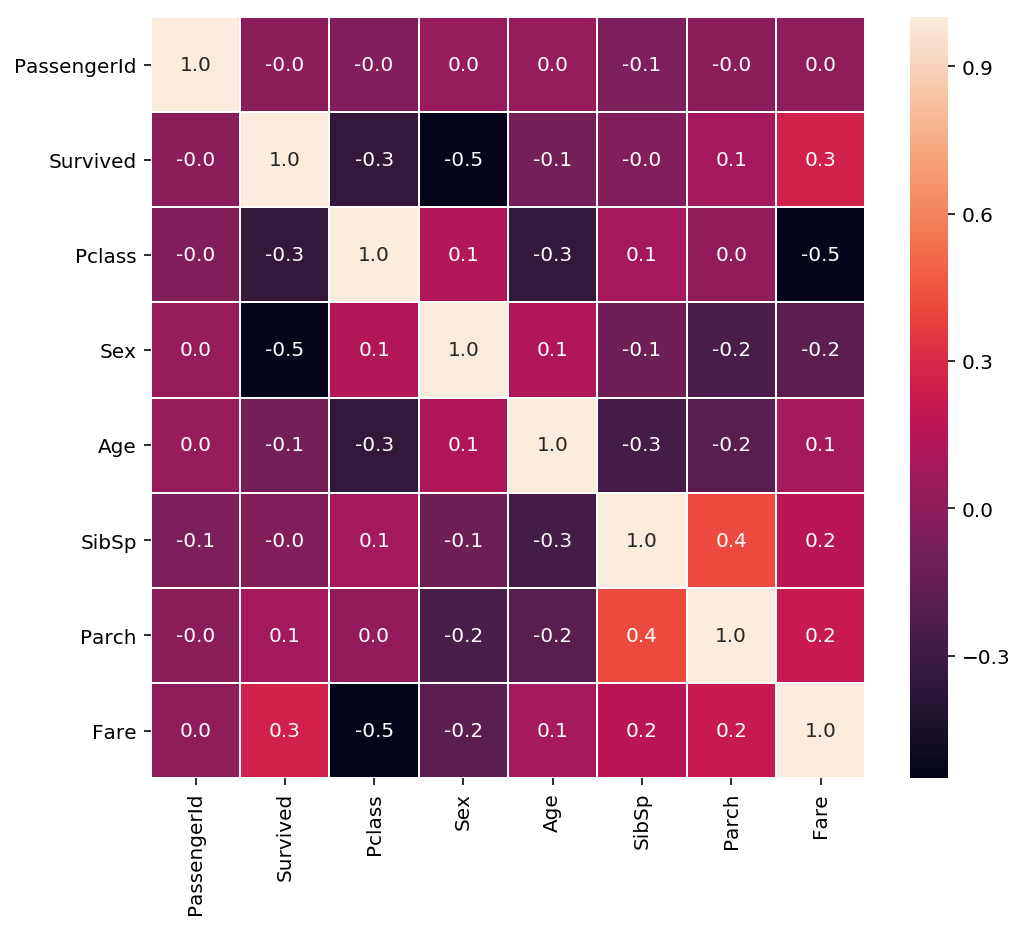

In [1755]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

## Getting dummies

In [1756]:
df_train= pd.get_dummies(train, drop_first=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,...,Title_Ms,Title_Rev,Title_Sir,NewCabin_B,NewCabin_C,NewCabin_D,NewCabin_E,NewCabin_F,NewCabin_G,NewCabin_T
0,1,0,3,1,22.0,1,0,7.2500,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1757]:
df_test= pd.get_dummies(train, drop_first=True)

In [1758]:
df_train.shape, df_test.shape

((891, 33), (891, 33))

In [1759]:
train.shape, test.shape

((891, 11), (418, 9))

In [1760]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,NewCabin
0,1,0,3,1,22.0,1,0,7.2500,S,Mr,NaN
1,2,1,1,0,38.0,1,0,71.2833,C,Mrs,C
2,3,1,3,0,26.0,0,0,7.9250,S,Miss,NaN
3,4,1,1,0,35.0,1,0,53.1000,S,Mrs,C
4,5,0,3,1,35.0,0,0,8.0500,S,Mr,NaN


In [1761]:
df.dtypes

Survived            int64
Pclass              int64
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Embarked_Q          uint8
Embarked_S          uint8
Title_Col           uint8
Title_Countess      uint8
Title_Don           uint8
Title_Dr            uint8
Title_Jonkheer      uint8
Title_Lady          uint8
Title_Major         uint8
Title_Master        uint8
Title_Miss          uint8
Title_Mlle          uint8
Title_Mme           uint8
Title_Mr            uint8
Title_Mrs           uint8
Title_Ms            uint8
Title_Rev           uint8
Title_Sir           uint8
NewCabin_B          uint8
NewCabin_C          uint8
NewCabin_D          uint8
NewCabin_E          uint8
NewCabin_F          uint8
NewCabin_G          uint8
NewCabin_T          uint8
dtype: object

In [1762]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34.5,0,0,7.8292,Q,Mr
1,893,3,0,47.0,1,0,7.0000,S,Mrs
2,894,2,1,62.0,0,0,9.6875,Q,Mr
3,895,3,1,27.0,0,0,8.6625,S,Mr
4,896,3,0,22.0,1,1,12.2875,S,Mrs


# Models (train)

In [1763]:
xvars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = train[xvars]
y = train['Survived']
y=y.values

In [1764]:
yvars=test.drop(['Embarked'], axis = 1)
yvars.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title'],
      dtype='object')

In [1765]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.33, 
                                                    random_state=42)

# Scaling

In [1766]:
ss = StandardScaler()
X_train_ss= ss.fit_transform(X_train)
X_test_ss= ss.fit_transform(X_test)

In [1767]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn. metrics import roc_auc_score

In [1768]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_ss,y_train)
lr_score = lr.score(X_train_ss,y_train)
lr_predicts = lr.predict(X_test_ss)
#lr_accuracy = accuracy_score(y_test, lr_predicts)
#lr_rocauc = roc_auc_score(y_test, lr_predicts)

# Logistoc Regression
log = LogisticRegression(C=.1, random_state=42, solver='saga', penalty='elasticnet', l1_ratio=.5)
log.fit(X_train_ss,y_train)
log_preds = log.predict(X_train_ss)
log_resids = y_train - log_preds
log_score = f1_score(y_train, log_preds, average='macro')  

# KNN 
knn= KNeighborsClassifier()
knn.fit(X_train_ss, y_train)
knn_preds= knn.predict(X_train_ss)
knn_resids = y_train - knn_preds
knn_score = f1_score(y_train, knn_preds, average='macro')  

# Bernoulli
brn = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
brn.fit(X_train_ss, y_train)
brn_score = brn.score(X_train_ss, y_train)

# Gauss
gauss = GaussianNB()
gauss.fit(X_train_ss, y_train)
gauss_score = gauss.score(X_train_ss, y_train)

# Bagging
bag = BaggingClassifier(n_estimators= 1000,
                       random_state=42)
bag.fit(X_train_ss, y_train)
preds= bag.predict(X_train_ss)
resids = y_train - preds
bag_score = f1_score(y_train, preds, average='macro')  

# Decision Tree
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train_ss, y_train)
preds= dt.predict(X_train_ss)
resids = y_train - preds
dt_score = f1_score(y_train, preds, average='macro')  

# SVC
svc = SVC(C=.1, kernel='linear', gamma='scale', probability=True, random_state=42)
svc.fit(X_train_ss, y_train)
svc_score = svc.score(X_train_ss, y_train)

# GBC
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_ss, y_train)
gbc_score = gbc.score(X_train_ss, y_train)

In [1769]:
print('LinearRegression_Accuracy:\t',lr_score)
print('LogisticRegression_Accuracy:\t',log_score)
print('KNN_Accuracy:\t\t\t',knn_score)
print('Bernoulli_Accuracy:\t\t',brn_score)
print('Gauss_Accuracy:\t\t\t',gauss_score)
print('Bagging_Accuracy:\t\t',bag_score)
print('DecisionTree_accuracy:\t\t',dt_score)
print('SVC_Accuracy:\t\t\t',svc_score)
print('GBC_Accuracy:\t\t\t',gbc_score)

LinearRegression_Accuracy:	 0.3614789809533242
LogisticRegression_Accuracy:	 0.7778250167133407
KNN_Accuracy:			 0.8372758647135516
Bernoulli_Accuracy:		 0.761744966442953
Gauss_Accuracy:			 0.790268456375839
Bagging_Accuracy:		 0.978343810181316
DecisionTree_accuracy:		 0.9782595479250513
SVC_Accuracy:			 0.7818791946308725
GBC_Accuracy:			 0.9060402684563759


Text(0.5, 1.0, 'Model Accuracy')

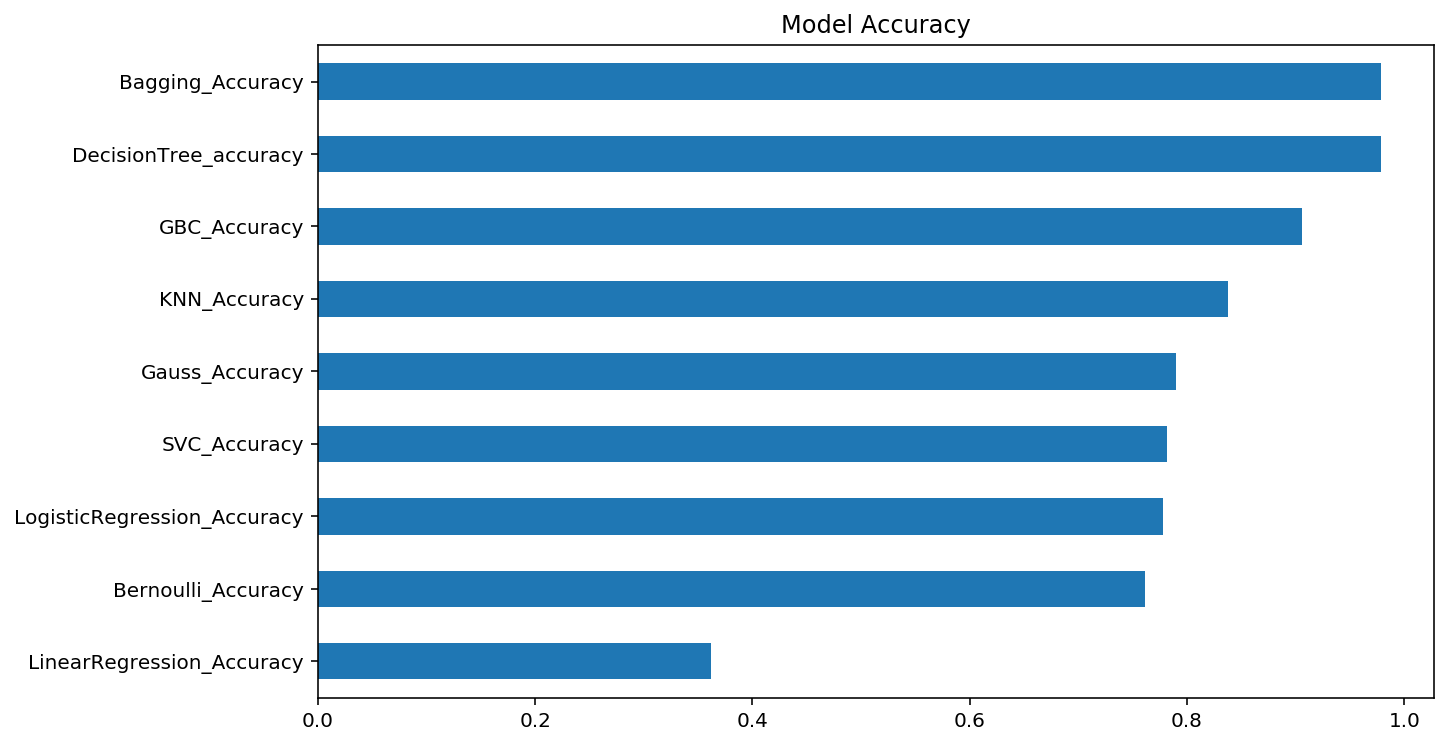

In [1770]:
model_accuracy = pd.Series(data=[lr_score,log_score,knn_score,brn_score,gauss_score,bag_score,dt_score,svc_score,gbc_score], 
                index=['LinearRegression_Accuracy','LogisticRegression_Accuracy','KNN_Accuracy',
                                      'Bernoulli_Accuracy','Gauss_Accuracy','Bagging_Accuracy','DecisionTree_accuracy','SVC_Accuracy','GBC_Accuracy'])
fig= plt.figure(figsize=(10,6))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

# Predictions

In [1702]:
text_X= test[xvars]

In [1703]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [1704]:
ss = StandardScaler()
text_X= ss.fit_transform(text_X)

In [1705]:
preds = bag.predict(text_X)

In [1706]:
preds.max()

1

In [1707]:
preds.min()

0

In [1708]:
preds.shape

(418,)

In [1709]:
submission = pd.DataFrame(test['PassengerId'])

In [1710]:
submission.shape

(418, 1)

In [1712]:
submission['Survived']= preds

In [1713]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1714]:
submission['Survived'].value_counts()

0    300
1    118
Name: Survived, dtype: int64

In [1716]:
submission.shape

(418, 2)

# Submission

In [1715]:
submission.to_csv('Subm1', index=False)